# Оформление проекта

На этой неделе вам предстоит оформить результат, используя интерактивные графики.

﻿Определитесь, в каком виде вы хотите представить ваш проект. Мы предлагаем вам сделать интерактивное демо, содержащее:

карты с визуализацией реального и прогнозируемого спроса на такси в выбираемый пользователем момент времени
временной ряд фактического и прогнозируемого спроса на такси в выбираемой области.
Немного материалов о том, как в ноутбуках можно делать интерактивные графики:

https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/  
﻿http://nbviewer.jupyter.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb  
https://github.com/ioam/holoviews

Попробуем инструменты оформления предлагаемые пакетом `panel`

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
pn.extension()
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import matplotlib.pyplot as plt

%matplotlib inline

## Задание 1. Изучите предложенные примеры виджетов и их комбинации


In [5]:
#Врем ряд фактического и прогнозируемого спроса

In [4]:
regions = pd.read_csv('regions.csv', sep=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [5]:
regions = pd.read_csv('nonzero_regions.csv').iloc[:,1]

In [74]:
united_june = pd.read_csv('united_june.csv')
united_june.time = pd.to_datetime(united_june.time)
united_june.index = united_june.time
united_june.head()

,time,y3,y5,y1,y4,y6,y2,forecast_1,forecast_2,forecast_3,forecast_4,forecast_5,forecast_6,p_1,p_2,p_3,p_4,p_5,p_6,reg
time,,,,,,,,,,,,,,,,,,,,
2016-05-31 23:00:00,2016-05-31 23:00:00,5.0,1.0,26.0,2.0,7.0,14.0,24.457574,11.847774,3.980710,3.370664,5.417630,11.157537,20.437786,12.797665,5.308792,2.489145,3.570617,-1.430789,1075
2016-06-01 00:00:00,2016-06-01 00:00:00,2.0,7.0,14.0,1.0,23.0,5.0,12.552305,4.571828,3.831541,5.774494,11.375248,22.164451,15.840590,6.997683,5.162610,6.159503,9.433222,23.594637,1075
2016-06-01 01:00:00,2016-06-01 01:00:00,1.0,23.0,5.0,7.0,34.0,2.0,5.233089,4.386354,6.207066,11.710195,22.368791,50.055329,5.374065,3.900729,4.860006,10.779229,21.945648,51.088463,1075
2016-06-01 02:00:00,2016-06-01 02:00:00,7.0,34.0,2.0,23.0,72.0,1.0,4.279886,6.117737,11.640548,22.314863,50.022429,81.843145,3.966870,4.875349,11.151024,22.262970,49.118572,81.778120,1075
2016-06-01 03:00:00,2016-06-01 03:00:00,23.0,72.0,1.0,34.0,54.0,7.0,5.076357,10.766806,21.633632,49.494942,81.521343,68.802504,4.342900,9.599047,20.957472,50.464120,83.582794,68.052810,1075


In [42]:
response_columns = ['y1', 'y2', 'y3', 'y4', 'y5', 'y6']

In [43]:
forecasts_columns = list(filter(lambda x: x.startswith("forecast"),united_june.columns))
print(forecasts_columns)

['forecast_1', 'forecast_2', 'forecast_3', 'forecast_4', 'forecast_5', 'forecast_6']


In [44]:
regr_columns = list(filter(lambda x: x.startswith("p_"),united_june.columns))
print(regr_columns)

['p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6']


In [184]:
start_date_slider = pn.widgets.DateSlider(name="Дата начала", 
                                    start = dt.datetime(2016, 6, 1),
                                    end = dt.datetime(2016, 6 ,30),
                                    value = dt.datetime(2016, 6, 1))

start_hour_slider = pn.widgets.IntSlider(name="Час конца", 
                                    start = 0, end = 24, step = 1,
                                    value = 0)

end_date_slider = pn.widgets.DateSlider(name="Дата конца истории", 
                                    start = dt.datetime(2016, 6, 1),
                                    end = dt.datetime(2016, 6 ,30),
                                    value = dt.datetime(2016, 6, 30))

end_hour_slider = pn.widgets.IntSlider(name="Час конца истории", 
                                    start = 0, end = 24, step = 1,
                                    value = 0)

lag_select = pn.widgets.Select(name="Дальность прогноза", 
                                    options = [1,2,3,4,5,6],
                                    value = 1)


region_select = pn.widgets.Select(name="Регион", 
                                    options = list(regions),
                                    value = 1231)

text_input_date = pn.widgets.TextInput(value=date_slider.value.strftime("%d:%m:%Y"))
text_input_time = pn.widgets.TextInput(value=str(hour_slider.value)+':00')

In [185]:
def update_text_input_date(event):     
    text_input_date.value = event.new.strftime("%d:%m:%Y")
    
    if (event.new == dt.datetime(2016, 6, 30).date()):
        if (hour_slider.value > 17): 
            hour_slider.value=17
    else: hour_slider.end=24
        
def update_text_input_time(event):     
    text_input_time.value = str(event.new)+':00'

In [186]:
def plot_ts(date_start, hour_start, date_end, hour_end, lag, reg): 
    fig = Figure(figsize=(6,3))
    FigureCanvas(fig)
    ax = fig.add_subplot()
    
    inds = [response_columns[lag-1], forecasts_columns[lag-1], regr_columns[lag-1]]
    df = pd.DataFrame(united_june[united_june.reg==reg][inds])
    
    ax.plot(
        df[(df.index >= (pd.to_datetime(date_start) + pd.Timedelta(hours = hour_start))) &
           (df.index <= (pd.to_datetime(date_end) + pd.Timedelta(hours = hour_end)))]
    )
    
    ax.legend(['Исходные', 'SARIMAX', 'xgboost'], loc=1, ncol = 3)
    
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 3]
    
    return (fig)

Tabs
    [0] Column(name='Дата и время')
        [0] Row
            [0] Column
                [0] Markdown(str)
                [1] WidgetBox
                    [0] DateSlider(end=datetime.datetime(2016, ..., name='Дата начала', start=datetime.datetime(2016, ..., value=datetime.datetime(2016, ...)
                    [1] IntSlider(end=24, name='Час конца')
            [1] Column
                [0] Markdown(str)
                [1] WidgetBox
                    [0] DateSlider(end=datetime.datetime(2016, ..., name='Дата конца истории', start=datetime.datetime(2016, ..., value=datetime.datetime(2016, ...)
                    [1] TextInput(value='30:06:2016')
                    [2] IntSlider(end=24, name='Час конца истории')
                    [3] TextInput(value='3:00')
        [1] ParamFunction(function)
    [1] Column(name='Прогноз')
        [0] Markdown(str)
        [1] WidgetBox
            [0] Select(name='Дальность прогноза', options=[1, 2, 3, 4, 5, 6], value=1)
            [1] Select(name='Регион', options=[1075, 1076, 1077, ...], value=1231)
        [2] ParamFunction(function)
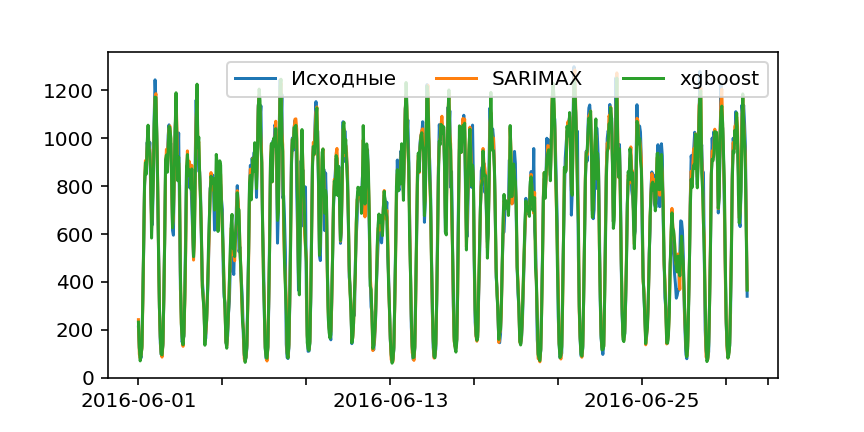
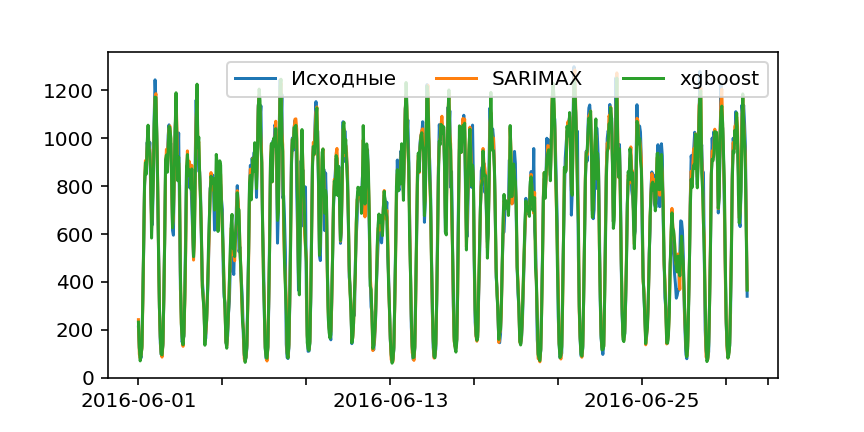

In [191]:
plotting = pn.bind(plot_ts, 
                   start_date_slider, start_hour_slider, 
                   end_date_slider, end_hour_slider, 
                   lag_select, region_select, watch=False)

end_date_slider.param.watch(update_text_input_date, 'value')
end_hour_slider.param.watch(update_text_input_time, 'value')

time_start_widgets = pn.WidgetBox(start_date_slider, start_hour_slider)
time_end_widgets = pn.WidgetBox(end_date_slider, text_input_date, end_hour_slider, text_input_time)
graph_widgets = pn.WidgetBox(lag_select, region_select)

page1 = pn.Column(
    pn.Row(
        pn.Column("\n - ### Дата и время начала", time_start_widgets),
        pn.Column("\n - ### Дата и время конца", time_end_widgets)
    ),
    plotting,
    name='Дата и время'
)

page2 = pn.Column("\n - ### Прогноз числа вызовов такси", graph_widgets, plotting, name='Прогноз')

tabs = pn.Tabs(page1, page2)
display(tabs)